In [52]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [45]:
data = """
/	map	map	map	bdry	bdry	bdry	iou	iou	iou	dice	dice	dice
/	mu	std	delta_mu	mu	std	delta_mu	mu	std	delta_mu	mu	std	delta_mu
017_e24_raw	0.914141414	0.280332149	0.009961169	0.266633339	0.280332149	0.009961169	0.651799143	0.280332149	0.009961169	0.756930766	0.280332149	0.009961169
018_e24_norm_max	0.928030303	0.258601039	0.009188988	0.273413602	0.258601039	0.009188988	0.663881571	0.258601039	0.009188988	0.770007519	0.258601039	0.009188988
028_e24_norm_roi	0.919191919	0.272712374	0.009690412	0.271588606	0.272712374	0.009690412	0.65941556	0.272712374	0.009690412	0.764050005	0.272712374	0.009690412
015_e100_raw	0.944444444	0.22920617	0.008144487	0.285981935	0.22920617	0.008144487	0.688004709	0.22920617	0.008144487	0.79263809	0.22920617	0.008144487
016_e100_norm_max	0.931818182	0.252216926	0.008962138	0.277130676	0.252216926	0.008962138	0.673256548	0.252216926	0.008962138	0.77832132	0.252216926	0.008962138
027_e100_norm_roi	0.945707071	0.226737996	0.008056784	0.286600049	0.226737996	0.008056784	0.685764107	0.226737996	0.008056784	0.79151052	0.226737996	0.008056784
019_e120_raw	0.934343434	0.247837317	0.008806516	0.274832901	0.247837317	0.008806516	0.669895295	0.247837317	0.008806516	0.776630482	0.247837317	0.008806516
020_e120_norm_max	0.926767677	0.26068209	0.009262935	0.27379901	0.26068209	0.009262935	0.667749456	0.26068209	0.009262935	0.772552954	0.26068209	0.009262935
029_e120_norm_roi	0.938131313	0.241069138	0.008566019	0.276376284	0.241069138	0.008566019	0.674120288	0.241069138	0.008566019	0.780746952	0.241069138	0.008566019



"""
df = pd.read_csv(io.StringIO(data.strip()), sep='\t', header=[0,1], index_col=0)
df

/                       map                          bdry                      \
/                        mu       std  delta_mu        mu       std  delta_mu   
017_e24_raw        0.914141  0.280332  0.009961  0.266633  0.280332  0.009961   
018_e24_norm_max   0.928030  0.258601  0.009189  0.273414  0.258601  0.009189   
028_e24_norm_roi   0.919192  0.272712  0.009690  0.271589  0.272712  0.009690   
015_e100_raw       0.944444  0.229206  0.008144  0.285982  0.229206  0.008144   
016_e100_norm_max  0.931818  0.252217  0.008962  0.277131  0.252217  0.008962   
027_e100_norm_roi  0.945707  0.226738  0.008057  0.286600  0.226738  0.008057   
019_e120_raw       0.934343  0.247837  0.008807  0.274833  0.247837  0.008807   
020_e120_norm_max  0.926768  0.260682  0.009263  0.273799  0.260682  0.009263   
029_e120_norm_roi  0.938131  0.241069  0.008566  0.276376  0.241069  0.008566   

/                       iou                          dice                      
/                        mu       std  delta_mu        mu       std  delta_mu  
017_e24_raw        0.651799  0.280332  0.009961  0.756931  0.280332  0.009961  
018_e24_norm_max   0.663882  0.258601  0.009189  0.770008  0.258601  0.009189  
028_e24_norm_roi   0.659416  0.272712  0.009690  0.764050  0.272712  0.009690  
015_e100_raw       0.688005  0.229206  0.008144  0.792638  0.229206  0.008144  
016_e100_norm_max  0.673257  0.252217  0.008962  0.778321  0.252217  0.008962  
027_e100_norm_roi  0.685764  0.226738  0.008057  0.791511  0.226738  0.008057  
019_e120_raw       0.669895  0.247837  0.008807  0.776630  0.247837  0.008807  
020_e120_norm_max  0.667749  0.260682  0.009263  0.772553  0.260682  0.009263  
029_e120_norm_roi  0.674120  0.241069  0.008566  0.780747  0.241069  0.008566

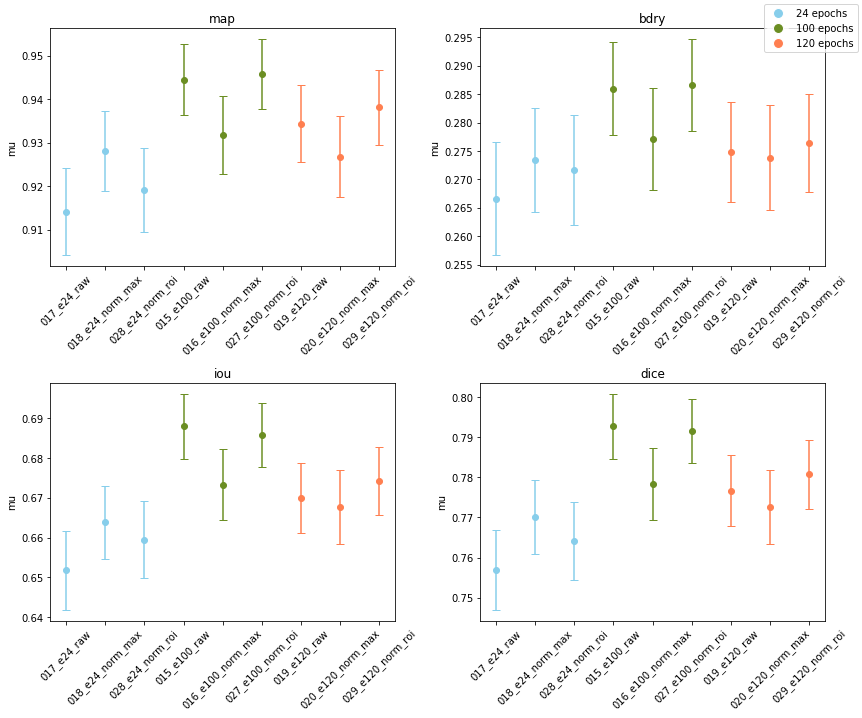

In [55]:
# Create a subplot for each category
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Define categories
categories = ["map", "bdry", "iou", "dice"]

# Define colors and labels
colors = ['skyblue', 'olivedrab', 'coral']
labels = ['24 epochs', '100 epochs', '120 epochs']

# Prepare legend elements manually
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=10) 
                   for c in colors]

# Loop over categories
for ax, category in zip(axs.flatten(), categories):
    ax.set_title(category)
    ax.set_ylabel('mu')
    ax.set_xticks(range(len(df.index)))
    ax.set_xticklabels(df.index, rotation=45)

    model_names = df.index

    for i in range(0, len(model_names), 3):
        ax.errorbar(model_names[i:i+3], df.loc[model_names[i:i+3], (category, 'mu')], 
                    yerr=df.loc[model_names[i:i+3], (category, 'delta_mu')], 
                    fmt='o', capsize=4, color=colors[i//3])

# Create a global legend
fig.legend(legend_elements, labels, loc='upper right')

plt.tight_layout()
plt.show()

In [57]:
data = """
/	map	map	map	bdry	bdry	bdry	iou	iou	iou	dice	dice	dice
/	mu	std	delta_mu	mu	std	delta_mu	mu	std	delta_mu	mu	std	delta_mu
023_e24_raw	0.820833334	0.295713681	0.046756438	0.57830339	0.295713681	0.038498642	0.686914346	0.295713681	0.038498642	0.719699541	0.295713681	0.038498642
024_e24_norm_max	0.827083334	0.280152774	0.044296043	0.561667554	0.280152774	0.036472785	0.69889554	0.280152774	0.036472785	0.730423839	0.280152774	0.036472785
031_e24_norm_roi	0.870833334	0.227983542	0.036047363	0.528259244	0.227983542	0.029680929	0.733013378	0.227983542	0.029680929	0.769681588	0.227983542	0.029680929
021_e100_raw	0.870833334	0.227983542	0.036047363	0.625396588	0.227983542	0.029680929	0.730953018	0.227983542	0.029680929	0.768943344	0.227983542	0.029680929
022_e100_norm_max	0.858333334	0.260259567	0.041150651	0.538157479	0.260259567	0.03388291	0.720580037	0.260259567	0.03388291	0.754994297	0.260259567	0.03388291
030_e100_norm_roi	0.858333334	0.260259567	0.041150651	0.519515805	0.260259567	0.03388291	0.718977856	0.260259567	0.03388291	0.754590515	0.260259567	0.03388291
025_e120_raw	0.858333334	0.260259567	0.041150651	0.595702454	0.260259567	0.03388291	0.715519975	0.260259567	0.03388291	0.753082228	0.260259567	0.03388291
026_e120_norm_max	0.845833334	0.265240577	0.041938218	0.547203783	0.265240577	0.034531382	0.700386224	0.265240577	0.034531382	0.737043915	0.265240577	0.034531382
032_e120_norm_roi	0.858333334	0.260259567	0.041150651	0.529984994	0.260259567	0.03388291	0.712303737	0.260259567	0.03388291	0.750534527	0.260259567	0.03388291

"""
df = pd.read_csv(io.StringIO(data.strip()), sep='\t', header=[0,1], index_col=0)
df

/                       map                          bdry                      \
/                        mu       std  delta_mu        mu       std  delta_mu   
023_e24_raw        0.820833  0.295714  0.046756  0.578303  0.295714  0.038499   
024_e24_norm_max   0.827083  0.280153  0.044296  0.561668  0.280153  0.036473   
031_e24_norm_roi   0.870833  0.227984  0.036047  0.528259  0.227984  0.029681   
021_e100_raw       0.870833  0.227984  0.036047  0.625397  0.227984  0.029681   
022_e100_norm_max  0.858333  0.260260  0.041151  0.538157  0.260260  0.033883   
030_e100_norm_roi  0.858333  0.260260  0.041151  0.519516  0.260260  0.033883   
025_e120_raw       0.858333  0.260260  0.041151  0.595702  0.260260  0.033883   
026_e120_norm_max  0.845833  0.265241  0.041938  0.547204  0.265241  0.034531   
032_e120_norm_roi  0.858333  0.260260  0.041151  0.529985  0.260260  0.033883   

/                       iou                          dice                      
/                        mu       std  delta_mu        mu       std  delta_mu  
023_e24_raw        0.686914  0.295714  0.038499  0.719700  0.295714  0.038499  
024_e24_norm_max   0.698896  0.280153  0.036473  0.730424  0.280153  0.036473  
031_e24_norm_roi   0.733013  0.227984  0.029681  0.769682  0.227984  0.029681  
021_e100_raw       0.730953  0.227984  0.029681  0.768943  0.227984  0.029681  
022_e100_norm_max  0.720580  0.260260  0.033883  0.754994  0.260260  0.033883  
030_e100_norm_roi  0.718978  0.260260  0.033883  0.754591  0.260260  0.033883  
025_e120_raw       0.715520  0.260260  0.033883  0.753082  0.260260  0.033883  
026_e120_norm_max  0.700386  0.265241  0.034531  0.737044  0.265241  0.034531  
032_e120_norm_roi  0.712304  0.260260  0.033883  0.750535  0.260260  0.033883

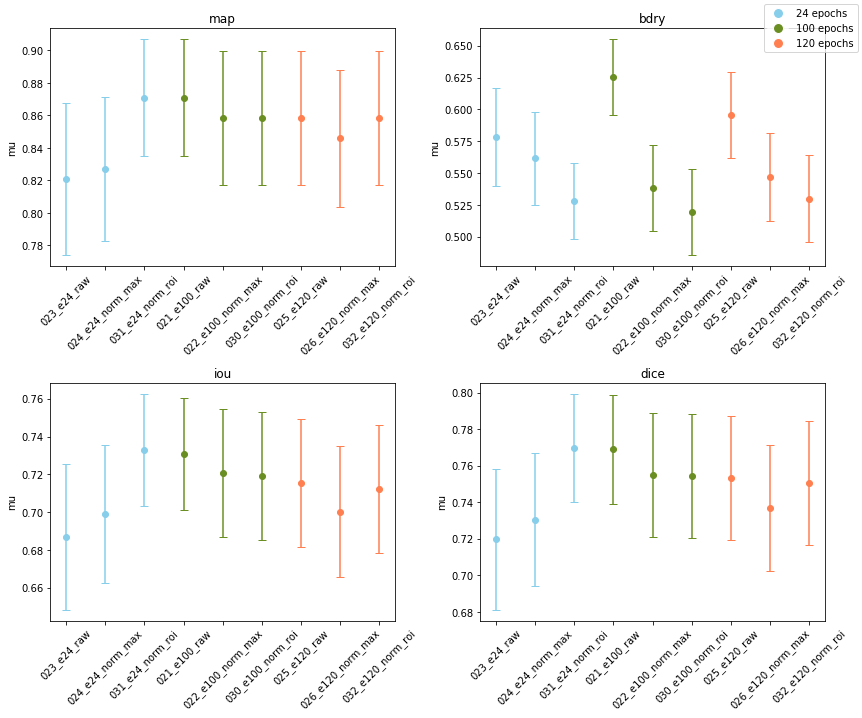

In [58]:
# Create a subplot for each category
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Define categories
categories = ["map", "bdry", "iou", "dice"]

# Define colors and labels
colors = ['skyblue', 'olivedrab', 'coral']
labels = ['24 epochs', '100 epochs', '120 epochs']

# Prepare legend elements manually
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=10) 
                   for c in colors]

# Loop over categories
for ax, category in zip(axs.flatten(), categories):
    ax.set_title(category)
    ax.set_ylabel('mu')
    ax.set_xticks(range(len(df.index)))
    ax.set_xticklabels(df.index, rotation=45)

    model_names = df.index

    for i in range(0, len(model_names), 3):
        ax.errorbar(model_names[i:i+3], df.loc[model_names[i:i+3], (category, 'mu')], 
                    yerr=df.loc[model_names[i:i+3], (category, 'delta_mu')], 
                    fmt='o', capsize=4, color=colors[i//3])

# Create a global legend
fig.legend(legend_elements, labels, loc='upper right')

plt.tight_layout()
plt.show()